# OMEGA-MAPPIN 

This notebook shows some of the analyses of the FOOF results from the MEG Data. 

The analyses code is all in a custom module (om). Here, is just a demonstration of some results. 

All data used here is at the source level. Each subject data was ultimately project to a template anatomy with 7500 vertices. 

In [4]:
# Imports
from __future__ import print_function
import numpy as np
import sys
import os

# Import general code from custom module om, and OO code for handling data
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')
from om.gen import *
from om.cl import *

# Set plots to display inline
%matplotlib inline

In [5]:
## Check what data is available
# Set file paths
foof_data_path = '/Users/thomasdonoghue/Documents/Research/1-Projects/OMEGA/2-Data/MEG/3-FOOF/Colin/pickle/'
files = os.listdir(foof_data_path)

# Get a list of files and list of available subjects
files = clean_file_list(files, 'Foof_Vertex')
sub_nums = get_sub_nums(files, 'first')

# Print out the list of subject numbers
print('\n Number of Subjects available: ' + str(len(sub_nums)) + '\n')
print('Subject numbers with FOOF data available: \n' + str(sub_nums) + '\n')


 Number of Subjects available: 22

Subject numbers with FOOF data available: 
[111802, 124340, 218131, 220216, 245518, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 431088, 504997, 548027, 559176, 604600, 704718, 704814, 756575, 978341]



### Single Subject Analysis

Here, loads a single subject and analyses the data. 

In [3]:
## Import an individual subject of FOOF PSD results

# Set subject number to load
#subj = sub_nums[0]
subj = 559176

# Initialize data object and load data
meg_subj = MegData()
meg_subj.import_foof(subj)

In [4]:
# Use oscillatory bands to find oscillations per band per vertex
osc = Osc()                      # Osc is an object that stores parameters for oscillatory bands
meg_subj.osc_bands_vertex(osc)

# This date can now be exported to matlab to be plotted on the cortex with Brainstorm
#meg_subj.save_viz()

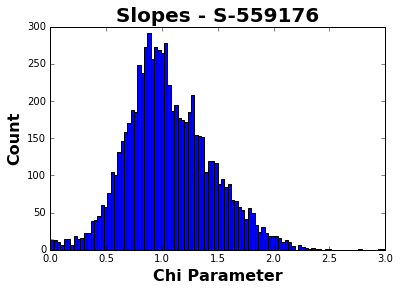

In [5]:
# Plot the distribution of slopes, as computed by FOOF
meg_subj.plot_slopes()

In [6]:
# Convert format to vectors of all oscillations (regardless of anatomical location)
meg_subj.all_oscs()

Number of oscillations: 21504


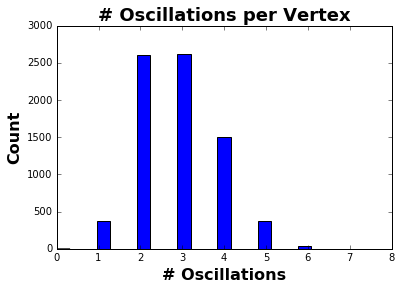

In [7]:
# Check how many oscillations were found total, and plot number of oscillations per vertex
print('Number of oscillations: ' + str(meg_subj.n_oscs))
meg_subj.plot_hist_count()

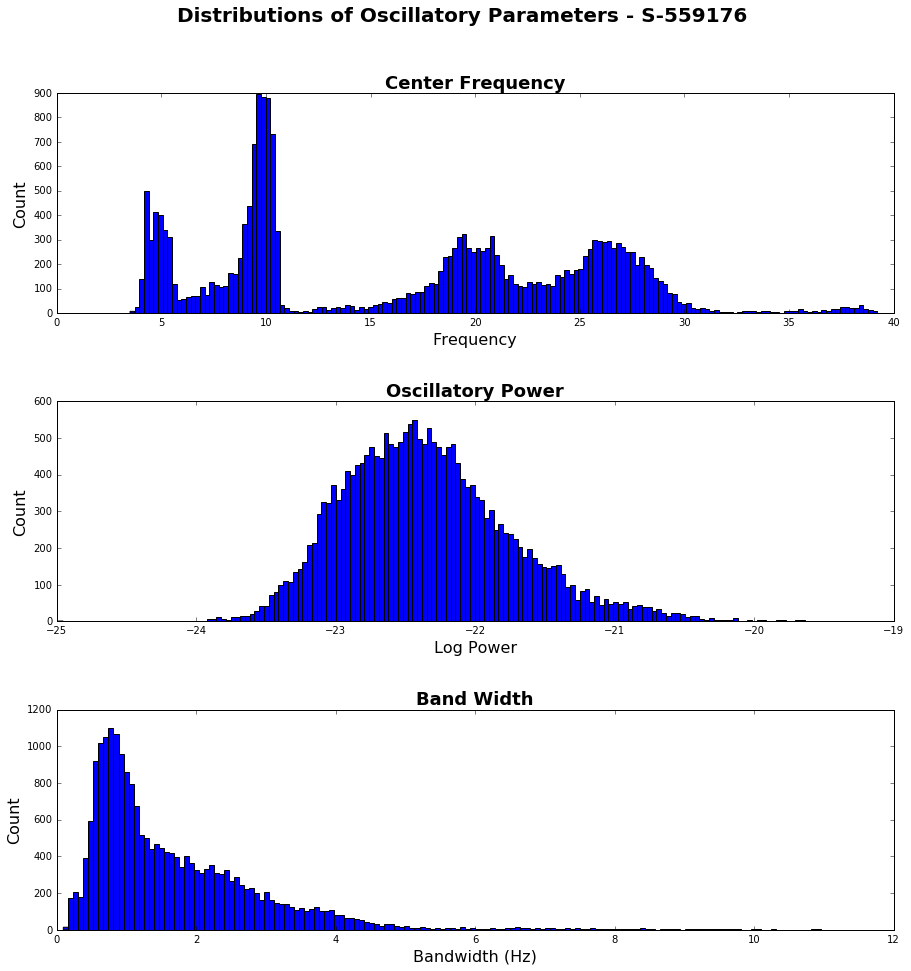

In [8]:
# Plot the distributions of centers, powers and bandwidths, across all oscillations
meg_subj.plot_all_oscs()

Corr of   Center - B.W. 	 is  +0.5354 	 with p-val of  0.00000
Corr of   Center - Power 	 is  -0.6053 	 with p-val of  0.00000
Corr of   B.W. - Power  	 is  -0.3983 	 with p-val of  0.00000


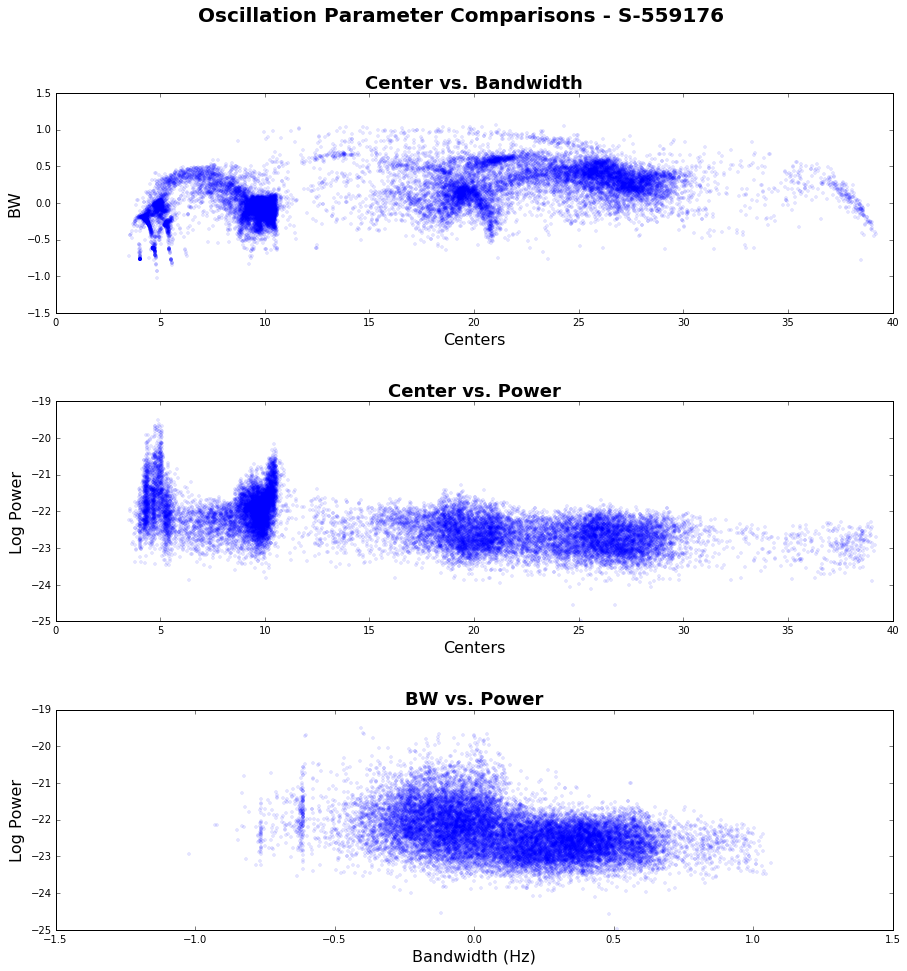

In [9]:
# Calculate correlations between oscillatory parameters and plot. 
subj_osc_param_corrs = meg_subj.plot_comparison()

# Print out the correlations between oscillation parameters
for corr in subj_osc_param_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

### GROUP ANALYSIS

Group Analysis

In [6]:
# Initialize MegGroup object
meg_group = GroupMegData()

In [7]:
# Add current subjects to meg_group
osc = Osc()
for subj in sub_nums:
    meg_subj = MegData()                               # Initialize MegData object
    meg_subj.import_foof(subj)                         # Import subject data
    meg_subj.all_oscs()                                # Create vectors of all oscillations
    meg_subj.peak_freq(osc)                            # Calculate oscillatory parameters
    meg_subj.osc_bands_vertex(osc)                     # Get oscillations per band per vertex
    meg_group.add_subject(meg_subj,                    # Add subject data to group object
                          add_all_oscs=True,               # Whether to include all-osc data
                          add_vertex_bands=True,           # Whether to include osc-band-vertex data
                          add_vertex_oscs=False,           # Whether to include all-osc data for each vertex
                          add_vertex_slopes=True)          # Whether to include the slopes per vertex across subjects

In [8]:
# Check how many subjects group includes
print('Currently analyzing ' + str(meg_group.n_subjs) + ' subjects.')

Currently analyzing 22 subjects.


Number of oscillations found across the whole group: 531828



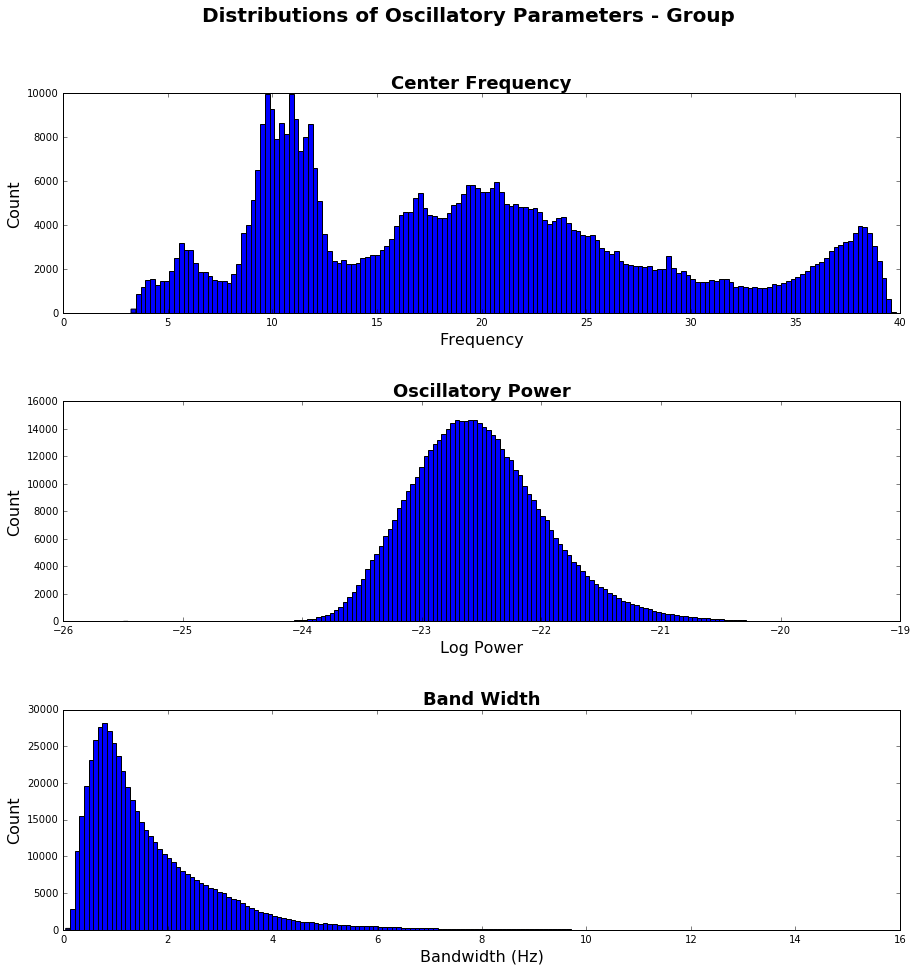

In [9]:
# Plot all oscillations across the group
print('Number of oscillations found across the whole group: ' + str(meg_group.n_oscs_tot) + '\n')
meg_group.plot_all_oscs()

Corr of   Center - B.W. 	 is  +0.1794 	 with p-val of  0.00000
Corr of   Center - Power 	 is  -0.5254 	 with p-val of  0.00000
Corr of   B.W. - Power  	 is  -0.1721 	 with p-val of  0.00000


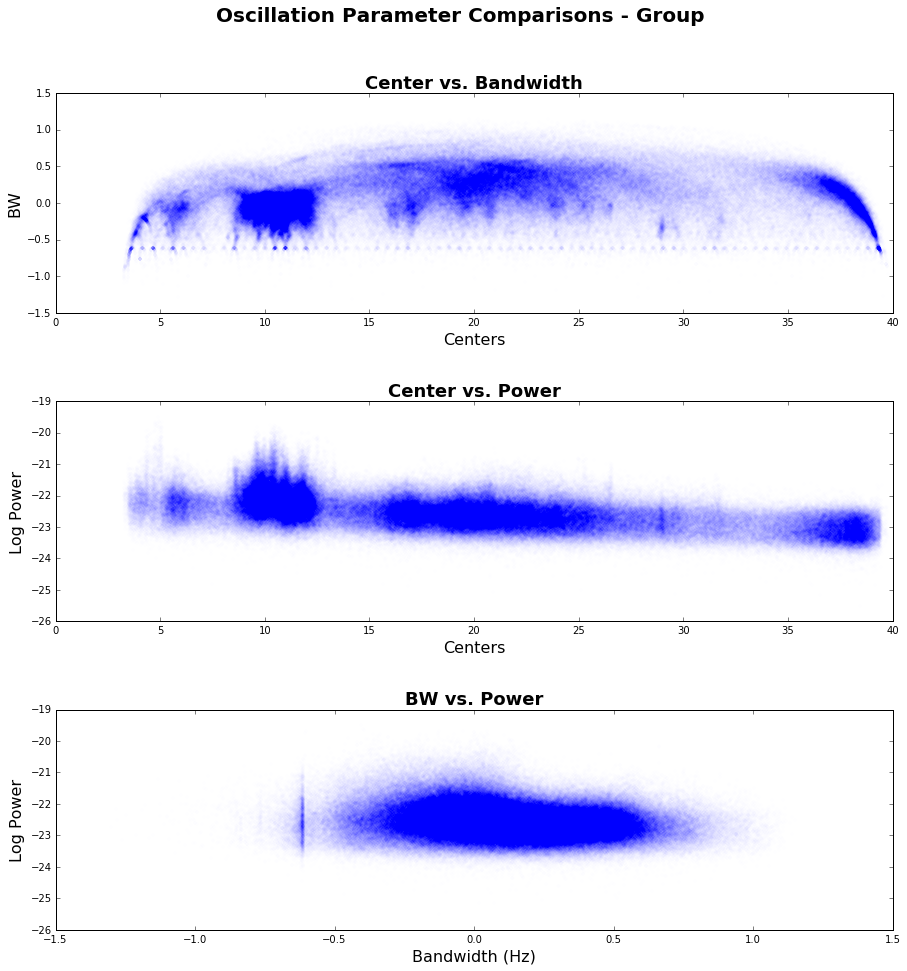

In [10]:
# Compare oscillation parameters across the whole group
osc_param_corrs = meg_group.plot_comparison()

#
for corr in osc_param_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

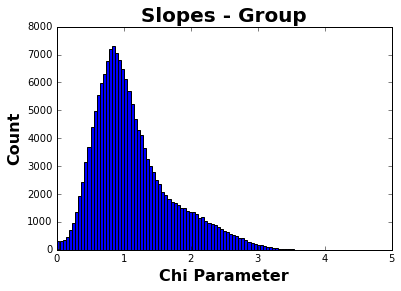

In [11]:
# Plot distribution of all slopes
meg_group.plot_slopes()

In [12]:
# Calculate Average Slope per Vertex and Save Out
meg_group.group_slope(save_out=False, file_name='Group_Slopes', set_viz=False)

In [13]:
# Calculate probability of oscilation (band specific) across the cortex
meg_group.osc_prob()

In [14]:
# Correlations between probabilities of oscillatory bands. 
osc_prob_corrs = meg_group.osc_prob_corrs()
for corr in osc_prob_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

Corr of   Theta-Alpha 	 is  -0.6393 	 with p-val of  0.00000
Corr of   Theta-Beta 	 is  +0.1578 	 with p-val of  0.00000
Corr of   Theta-LG 	 is  +0.0891 	 with p-val of  0.00000
Corr of   Alpha-Beta 	 is  -0.3661 	 with p-val of  0.00000
Corr of   Alpha-LG 	 is  +0.2309 	 with p-val of  0.00000
Corr of   Beta-LG 	 is  -0.5571 	 with p-val of  0.00000


In [19]:
# Save group osc-probability data for visualization with Brainstorm
meg_group.set_prob_vis()

In [15]:
# Oscillation score
meg_group.osc_score()

In [21]:
# Save osc-score npz file
#meg_group.save_osc_score('Group_Osc_Scores')

# OLD - BELOW CODE NOW IMPLEMENTED IN OM AS ABOVE. STILL NEEDS TESTING
#npz_save_path = '/Users/thomasdonoghue/Documents/Research/1-Projects/OMEGA/2-Data/Maps/Oscs/'
#npz_file_name = 'Group_Osc_Scores.npz'
#npz_save_name = os.path.join(npz_save_path, npz_file_name)
#np.savez(npz_save_name, osc_score_theta=meg_group.theta_score, osc_score_alpha=meg_group.alpha_score, osc_score_beta=meg_group.beta_score, osc_score_lowgamma=meg_group.lowgamma_score)

In [22]:
# Save group osc-score data for visualization with Brainstorm
meg_group.set_score_vis()

In [16]:
# Correlations between osc-scores of oscillatory bands. 
osc_score_corrs = meg_group.osc_score_corrs()
for corr in osc_score_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

Corr of   Theta-Alpha 	 is  -0.0633 	 with p-val of  0.00000
Corr of   Theta-Beta 	 is  +0.0973 	 with p-val of  0.00000
Corr of   Theta-LG 	 is  +0.2461 	 with p-val of  0.00000
Corr of   Alpha-Beta 	 is  +0.6866 	 with p-val of  0.00000
Corr of   Alpha-LG 	 is  +0.1920 	 with p-val of  0.00000
Corr of   Beta-LG 	 is  +0.1559 	 with p-val of  0.00000


## Demographics

We have limited demographic information with the OMEGA database.

At a minimum, for each subject we have birth year, giving us approximate age, and sex. 

In [17]:
# Check demographics
print('Ages range from ', min(meg_group.age), ' to ', max(meg_group.age), 
      ' with an average of ', np.mean(meg_group.age))
print('There are ', meg_group.sex.count('M'), ' males and ', meg_group.sex.count('F'), 'females')

Ages range from  21.0  to  40.0  with an average of  26.7727272727
There are  11  males and  11 females


Corr of   Theta Peak - Age 	 is  -0.1367 	 with p-val of  0.54425
Corr of   Alpha Peak - Age 	 is  -0.1521 	 with p-val of  0.49908
Corr of   Beta Peak - Age 	 is  -0.3382 	 with p-val of  0.12364
Corr of   LG Peak - Age 	 is  -0.0151 	 with p-val of  0.94676




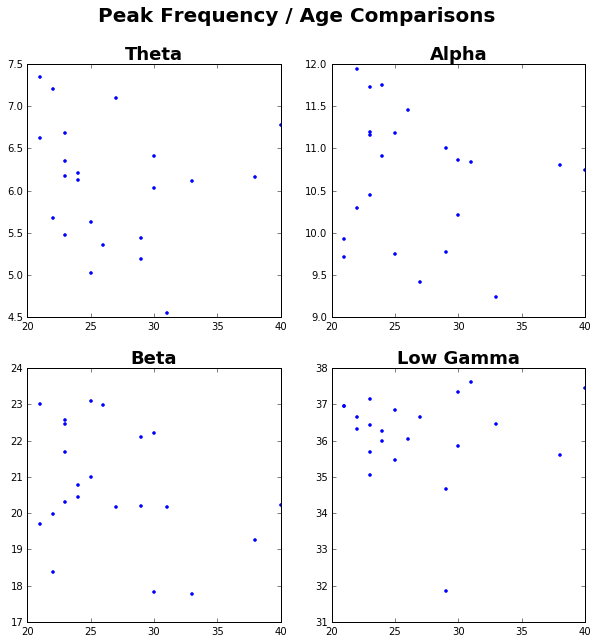

In [18]:
# Comparison of age and peak frequency within oscillatory bands
age_peak_corrs = meg_group.osc_age_comparison_plot()
for corr in age_peak_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))
print('\n')

Corr of # Oscillations / Age is  +0.4333  with p-val of  0.04394 



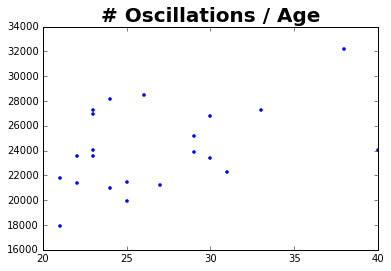

In [19]:
# Check for correlation between number of oscillations found and age. 
plt.plot(meg_group.age, meg_group.n_oscs, '.')
plt.title('# Oscillations / Age', fontsize=20, fontweight='bold')
[r_age_nOsc, p_age_nOsc] = pearsonr(meg_group.age, meg_group.n_oscs)
print('Corr of # Oscillations / Age is ', '{:+1.4f}'.format(r_age_nOsc), 
          ' with p-val of ', '{:1.5f}'.format(p_age_nOsc), '\n')

In [27]:
# Get inds of male and female subjects
m_inds = [i for i, x in enumerate(meg_group.sex) if x == "M"]
f_inds = [i for i, x in enumerate(meg_group.sex) if x == "F"]

# NOTE: I explored a couple parameters, such as nOscs and peak-band-oscs, to see if anything looked different. 
# Total fishing expedition, and not enough subjects to really see anything. Revisit with more subjects. 

## Reload MEG Group

The MEG Group object risks getting quite large, and can end up with the same data loaded in multiple formats. 
To pre-empt that, here a new object is loaded with differently organized data for other analysis. 

In [24]:
# Initialize MegGroup object
meg_group = GroupMegData()

In [25]:
# Add current subjects to meg_group
for subj in sub_nums:
    meg_subj = MegData()                               # Initialize MegData object
    meg_subj.import_foof(subj)                         # Import subject data
    meg_group.add_subject(meg_subj,                    # Add subject data to group object
                          add_all_oscs=False,               # Don't include all-osc data
                          add_vertex_bands=False,           # Don't include osc-band-vertex data
                          add_vertex_oscs=True)             # Include oscillations per vertex

In [26]:
# Do the rolling frequency correlation. 
f_win = 3
corr_vec, p_vec = meg_group.freq_corr(f_win)

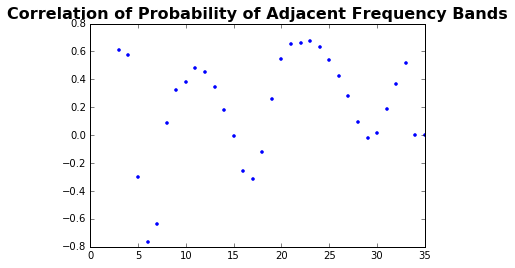

In [27]:
# Plot rolling frequency correlation
fs = np.transpose(range(3, 40-f_win-1))
plt.plot(fs, corr_vec, '.')
plt.title('Correlation of Probability of Adjacent Frequency Bands', fontsize=16, fontweight='bold')